# **Data preprocessing**


In [1]:
import pandas as pd

data_path = '/content/keplar.csv'

df = pd.read_csv(data_path)
totalRows = df.shape
print("Total rows:", totalRows)
print(df.head())

Total rows: (9564, 44)
  koi_disposition  koi_score  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  \
0       CONFIRMED      1.000              0              0              0   
1       CONFIRMED      0.969              0              0              0   
2       CANDIDATE      0.000              0              0              0   
3  FALSE POSITIVE      0.000              0              1              0   
4       CONFIRMED      1.000              0              0              0   

   koi_fpflag_ec  koi_period  koi_period_err1  koi_period_err2  koi_time0bk  \
0              0    9.488036     2.780000e-05    -2.780000e-05   170.538750   
1              0   54.418383     2.480000e-04    -2.480000e-04   162.513840   
2              0   19.899140     1.490000e-05    -1.490000e-05   175.850252   
3              0    1.736952     2.630000e-07    -2.630000e-07   170.307565   
4              0    2.525592     3.760000e-06    -3.760000e-06   171.595550   

   ...  koi_steff_err2  koi_slogg  koi_

In [2]:
totalRows = df.shape
print("Total rows:", totalRows)


missing_per_column = df.isnull().sum()
print("Missing values :\n", missing_per_column)

# rows that have at least one missing value
rows_with_missing = df.isnull().any(axis=1).sum()
print("\nTotal rows with at least one missing value:", rows_with_missing)

Total rows: (9564, 44)
Missing values :
 koi_disposition         0
koi_score            1510
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1       454
koi_period_err2       454
koi_time0bk             0
koi_time0bk_err1      454
koi_time0bk_err2      454
koi_impact            363
koi_impact_err1       454
koi_impact_err2       454
koi_duration            0
koi_duration_err1     454
koi_duration_err2     454
koi_depth             363
koi_depth_err1        454
koi_depth_err2        454
koi_prad              363
koi_prad_err1         363
koi_prad_err2         363
koi_teq               363
koi_teq_err1         9564
koi_teq_err2         9564
koi_insol             321
koi_insol_err1        321
koi_insol_err2        321
koi_model_snr         363
koi_tce_plnt_num      346
koi_steff             363
koi_steff_err1        468
koi_steff_err2        483
koi_slogg             363
koi_slogg_err1        4

In [3]:
# Drop columns with more than 500 missing values
cols_to_drop = missing_per_column[missing_per_column > 500].index.tolist()
df = df.drop(columns=cols_to_drop)

# Fill remaining missing values with the mean of the column
df = df.fillna(df.mean(numeric_only=True))

print("Data shape after dropping columns and filling missing values:", df.shape)
print("\nMissing values after processing:\n", df.isnull().sum())

Data shape after dropping columns and filling missing values: (9564, 41)

Missing values after processing:
 koi_disposition      0
koi_fpflag_nt        0
koi_fpflag_ss        0
koi_fpflag_co        0
koi_fpflag_ec        0
koi_period           0
koi_period_err1      0
koi_period_err2      0
koi_time0bk          0
koi_time0bk_err1     0
koi_time0bk_err2     0
koi_impact           0
koi_impact_err1      0
koi_impact_err2      0
koi_duration         0
koi_duration_err1    0
koi_duration_err2    0
koi_depth            0
koi_depth_err1       0
koi_depth_err2       0
koi_prad             0
koi_prad_err1        0
koi_prad_err2        0
koi_teq              0
koi_insol            0
koi_insol_err1       0
koi_insol_err2       0
koi_model_snr        0
koi_tce_plnt_num     0
koi_steff            0
koi_steff_err1       0
koi_steff_err2       0
koi_slogg            0
koi_slogg_err1       0
koi_slogg_err2       0
koi_srad             0
koi_srad_err1        0
koi_srad_err2        0
ra                

In [4]:
# Drop rows with at least one missing value
#df_clean = df.dropna()

#print("New data shape after dropping rows with missing values:", df_clean.shape)

Correlation Matrix:


,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
koi_fpflag_nt,1.000000,-0.023270,-0.004575,0.000576,0.001554,0.021199,-0.021199,0.016143,0.014168,-0.014168,...,-0.011201,-0.001982,-0.001589,-0.006559,0.000393,0.002640,-0.001159,0.012693,0.007914,-0.003753
koi_fpflag_ss,-0.023270,1.000000,0.151233,0.096539,-0.020557,-0.134401,0.134401,-0.117435,-0.171986,0.171986,...,-0.172346,-0.075403,0.121204,-0.042845,0.046748,0.050167,-0.044772,0.086374,-0.048116,0.000628
koi_fpflag_co,-0.004575,0.151233,1.000000,0.523851,-0.020804,-0.090568,0.090568,-0.123592,-0.034288,0.034288,...,-0.109935,-0.018756,-0.007335,-0.050051,0.041256,0.037430,-0.030406,0.159923,-0.097175,0.060591
koi_fpflag_ec,0.000576,0.096539,0.523851,1.000000,-0.017021,-0.080967,0.080967,-0.101114,0.001934,-0.001934,...,-0.076678,0.002035,-0.005208,-0.036095,0.019180,0.026472,-0.009979,0.070498,-0.045119,0.039075
koi_period,0.001554,-0.020557,-0.020804,-0.017021,1.000000,0.053133,-0.053133,0.095580,0.020771,-0.020771,...,0.003193,0.001876,-0.006464,-0.003179,-0.000993,-0.000435,0.001555,0.005670,0.011479,-0.009858
koi_period_err1,0.021199,-0.134401,-0.090568,-0.080967,0.053133,1.000000,-1.000000,0.416226,0.515698,-0.515698,...,-0.058292,-0.006194,0.005101,-0.184847,0.005320,0.031228,-0.001919,-0.031276,0.009170,-0.025189
koi_period_err2,-0.021199,0.134401,0.090568,0.080967,-0.053133,-1.000000,1.000000,-0.416226,-0.515698,0.515698,...,0.058292,0.006194,-0.005101,0.184847,-0.005320,-0.031228,0.001919,0.031276,-0.009170,0.025189
koi_time0bk,0.016143,-0.117435,-0.123592,-0.101114,0.095580,0.416226,-0.416226,1.000000,0.160402,-0.160402,...,-0.025562,-0.006047,-0.031911,-0.117490,-0.004786,0.010294,0.009856,-0.029615,0.012702,0.010124
koi_time0bk_err1,0.014168,-0.171986,-0.034288,0.001934,0.020771,0.515698,-0.515698,0.160402,1.000000,-1.000000,...,-0.063753,-0.034421,0.031649,-0.145592,0.029248,0.052077,-0.025039,-0.013142,-0.002968,-0.039385
koi_time0bk_err2,-0.014168,0.171986,0.034288,-0.001934,-0.020771,-0.515698,0.515698,-0.160402,-1.000000,1.000000,...,0.063753,0.034421,-0.031649,0.145592,-0.029248,-0.052077,0.025039,0.013142,0.002968,0.039385


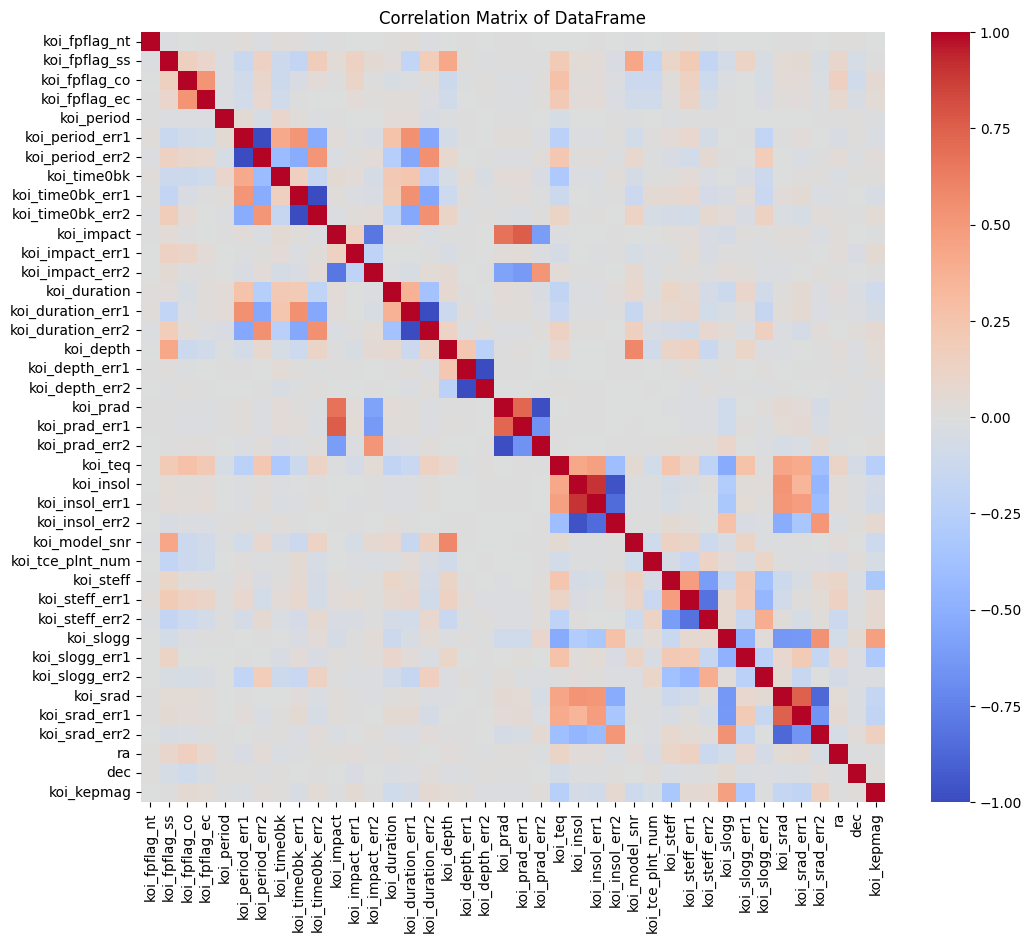

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Display the correlation matrix (optional: display only the upper triangle to avoid redundancy)
print("Correlation Matrix:")
display(correlation_matrix)

# You can also visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix of DataFrame')
plt.show()

In [6]:
import numpy as np
# Calculate correlations with the target variable
# We need to first map the target variable to numerical values for correlation calculation
df_encoded = df.copy()
df_encoded['koi_disposition'] = df_encoded['koi_disposition'].map({
    'CONFIRMED': 2,
    'CANDIDATE': 1,
    'FALSE POSITIVE': 0
})

# Set a threshold for high correlation between features (multicollinearity)
multicollinearity_threshold = 0.75

# Find pairs of highly correlated features
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop_multicollinear = [column for column in upper.columns if any(upper[column].abs() > multicollinearity_threshold)]

print("\nFeatures to drop due to high multicollinearity:", to_drop_multicollinear)

# Combine the lists of features to drop
columns_to_drop = list(set( to_drop_multicollinear))

# Drop the identified columns from the DataFrame
df_clean = df.drop(columns=columns_to_drop)

print("\nData shape after dropping features:", df_clean.shape)
print("\nColumns remaining:", df_clean.columns.tolist())


Features to drop due to high multicollinearity: ['koi_period_err2', 'koi_time0bk_err2', 'koi_impact_err2', 'koi_duration_err2', 'koi_depth_err2', 'koi_prad_err1', 'koi_prad_err2', 'koi_insol_err1', 'koi_insol_err2', 'koi_steff_err2', 'koi_srad_err2']

Data shape after dropping features: (9564, 30)

Columns remaining: ['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_time0bk', 'koi_time0bk_err1', 'koi_impact', 'koi_impact_err1', 'koi_duration', 'koi_duration_err1', 'koi_depth', 'koi_depth_err1', 'koi_prad', 'koi_teq', 'koi_insol', 'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad', 'koi_srad_err1', 'ra', 'dec', 'koi_kepmag']


In [7]:
features_to_remove = [
    'koi_time0bk',           # transit epoch (absolute time)
    'koi_time0bk_err1',      # uncertainty in transit epoch
    'koi_impact_err1',       # uncertainty in impact parameter
    'koi_duration_err1',     # uncertainty in transit duration
    'koi_depth_err1',        # uncertainty in transit depth
    'koi_steff_err1',        # uncertainty in stellar temperature
    'koi_slogg_err1',        # uncertainty in stellar surface gravity
    'koi_slogg_err2',        # uncertainty in stellar surface gravity
    'koi_tce_plnt_num',      # planet index, irrelevant for classification
    'ra',                    # sky coordinate, irrelevant
    'dec',                   # sky coordinate, irrelevant
    'koi_srad_err1',
    'koi_period_err1'

]

df_clean = df_clean.drop(columns=features_to_remove)

print("Data shape after dropping explicitly listed features:", df_clean.shape)
print("\nColumns remaining:", df_clean.columns.tolist())

Data shape after dropping explicitly listed features: (9564, 17)

Columns remaining: ['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_impact', 'koi_duration', 'koi_depth', 'koi_prad', 'koi_teq', 'koi_insol', 'koi_model_snr', 'koi_steff', 'koi_slogg', 'koi_srad', 'koi_kepmag']


In [8]:
print(df_clean.shape)

(9564, 17)


In [9]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df_clean['target'] = df_clean['koi_disposition'].map({
    'CONFIRMED': 2,
    'CANDIDATE': 1,
    'FALSE POSITIVE': 0
})
df_clean = df_clean.drop('koi_disposition', axis=1)

X = df_clean.drop('target', axis=1)
y = df_clean['target']

X = X.select_dtypes(include=[np.number])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

## Models
Based on those research which is and our thoughts:

[Exoplanet detection using machine learning](https://academic.oup.com/mnras/article/513/4/5505/6472249?login=false)

[Assessment of Ensemble-Based Machine Learning Algorithms for Exoplanet Identification
](https://www.mdpi.com/2079-9292/13/19/3950#B19-electronics-13-03950)

[IDENTIFYING EXOPLANETS WITH MACHINE
LEARNING METHODS: A PRELIMINARY STUDY](https://arxiv.org/pdf/2204.00721)


Model 1

Simple random Forest


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

rf = RandomForestClassifier(class_weight='balanced', random_state=42)

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [6, 8, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['sqrt', 'log2']
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='f1_macro',
    n_jobs=-1,
    random_state=42
)


random_search.fit(X_train, y_train)
best_rf = random_search.best_estimator_
print("Best params:", random_search.best_params_)

Best params: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_depth': None}


In [11]:
best_rf.fit(X_train, y_train)
y_test_pred = best_rf.predict(X_test)


              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1421
           1       0.81      0.83      0.82       619
           2       0.88      0.88      0.88       830

    accuracy                           0.92      2870
   macro avg       0.89      0.90      0.90      2870
weighted avg       0.92      0.92      0.92      2870



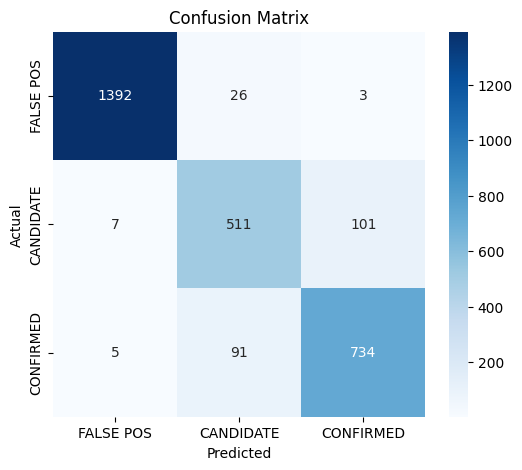

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print(classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['FALSE POS', 'CANDIDATE', 'CONFIRMED'],
            yticklabels=['FALSE POS', 'CANDIDATE', 'CONFIRMED'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [13]:
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Example of how to use KFold with cross_val_score (using best_rf from previous steps)
# This calculates the F1-macro score for each fold
cv_scores = cross_val_score(best_rf, X_scaled, y, cv=kf, scoring='f1_macro')

print("Cross-validation F1-macro scores for each fold:", cv_scores)
print("Mean cross-validation F1-macro score:", np.mean(cv_scores))
print("Standard deviation of cross-validation F1-macro scores:", np.std(cv_scores))
print(cv_scores.mean(), cv_scores.std())

Cross-validation F1-macro scores for each fold: [0.88969039 0.88501887 0.90067029 0.90497293 0.91336406 0.90537713
 0.90923209 0.89378918 0.88433265 0.8923807 ]
Mean cross-validation F1-macro score: 0.8978828294837417
Standard deviation of cross-validation F1-macro scores: 0.009725813411432593
0.8978828294837417 0.009725813411432593


Model 2

XGBoost

In [14]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

xgb = XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    eval_metric='mlogloss',
    scale_pos_weight=1,
    random_state=42
)

xgb.fit(X_train, y_train)
y_test_pred_xgb = xgb.predict(X_test)

print("XGBoost Test Accuracy:", accuracy_score(y_test, y_test_pred_xgb))
print(classification_report(y_test, y_test_pred_xgb))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:33:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Test Accuracy: 0.9153310104529617
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1421
           1       0.82      0.79      0.80       619
           2       0.86      0.90      0.88       830

    accuracy                           0.92      2870
   macro avg       0.89      0.89      0.89      2870
weighted avg       0.92      0.92      0.92      2870



In [15]:
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

# Initialize KFold with 10 splits
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Example of how to use KFold with cross_val_score (using xgb from previous steps)
# This calculates the F1-macro score for each fold
cv_scores_xgb = cross_val_score(xgb, X_scaled, y, cv=kf, scoring='f1_macro')

print("Cross-validation F1-macro scores for each fold (XGBoost):", cv_scores_xgb)
print("Mean cross-validation F1-macro score (XGBoost):", np.mean(cv_scores_xgb))
print("Standard deviation of cross-validation F1-macro scores (XGBoost):", np.std(cv_scores_xgb))
print(cv_scores_xgb.mean(), cv_scores_xgb.std())

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:33:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:33:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:33:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:33:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:33:28] WARNING: /works

Cross-validation F1-macro scores for each fold (XGBoost): [0.88847242 0.87116455 0.90123365 0.89617684 0.9151411  0.89902011
 0.90353722 0.90014676 0.8971298  0.90831261]
Mean cross-validation F1-macro score (XGBoost): 0.8980335072451873
Standard deviation of cross-validation F1-macro scores (XGBoost): 0.011233521079355116
0.8980335072451873 0.011233521079355116


Model 3

LightGBM

In [16]:

import lightgbm as lgb

lgbm = lgb.LGBMClassifier(
    objective='multiclass',
    num_class=3,
    max_depth=8,
    class_weight='balanced',
    n_estimators=200,
    random_state=42
)

lgbm.fit(X_train, y_train)
y_test_pred_lgbm = lgbm.predict(X_test)
print("LightGBM Accuracy:", lgbm.score(X_test, y_test))
print(classification_report(y_test, y_test_pred_lgbm))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001345 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3073
[LightGBM] [Info] Number of data points in the train set: 6694, number of used features: 16
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM Accuracy: 0.9132404181184669
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1421
           1       0.81      0.79      0.80       619
           2       0.86      0.89      0.87       830

    accuracy                           0.91      2870
   macro avg       0.89      0.89      0.89      2870
weighted avg       0.91      0.91      0.91      2870



In [17]:
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

# Initialize KFold with 10 splits
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Example of how to use KFold with cross_val_score (using lgbm from previous steps)
# This calculates the F1-macro score for each fold
cv_scores_lgbm = cross_val_score(lgbm, X_scaled, y, cv=kf, scoring='f1_macro')

print("Cross-validation F1-macro scores for each fold (LightGBM):", cv_scores_lgbm)
print("Mean cross-validation F1-macro score (LightGBM):", np.mean(cv_scores_lgbm))
print("Standard deviation of cross-validation F1-macro scores (LightGBM):", np.std(cv_scores_lgbm))
print(cv_scores_lgbm.mean(), cv_scores_lgbm.std())

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000895 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3073
[LightGBM] [Info] Number of data points in the train set: 8607, number of used features: 16
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000901 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3073
[LightGBM] [Info] Number of data points in the train set: 8607, number of used features: 16
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000920 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3073
[LightGBM] [Info] Number of data points in the train set: 8607, number of used features: 16
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001370 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3073
[LightGBM] [Info] Number of data points in the train set: 8607, number of used features: 16
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001339 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3073
[LightGBM] [Info] Number of data points in the train set: 8608, number of used features: 16
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000871 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3072
[LightGBM] [Info] Number of data points in the train set: 8608, number of used features: 16
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000884 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3073
[LightGBM] [Info] Number of data points in the train set: 8608, number of used features: 16
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001329 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3073
[LightGBM] [Info] Number of data points in the train set: 8608, number of used features: 16
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002767 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3073
[LightGBM] [Info] Number of data points in the train set: 8608, number of used features: 16
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001394 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3073
[LightGBM] [Info] Number of data points in the train set: 8608, number of used features: 16
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [18]:
from sklearn.metrics import accuracy_score
import pandas as pd

rf_accuracy = accuracy_score(y_test, y_test_pred)
xgb_accuracy = accuracy_score(y_test, y_test_pred_xgb)
y_test_pred_lgbm = lgbm.predict(X_test)
lgbm_accuracy = accuracy_score(y_test, y_test_pred_lgbm)


accuracy_comparison = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost', 'LightGBM'],
    'Accuracy': [rf_accuracy, xgb_accuracy, lgbm_accuracy]
})

print("Model Accuracy Comparison:")
display(accuracy_comparison)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Model Accuracy Comparison:


,Model,Accuracy
0,Random Forest,0.918815
1,XGBoost,0.915331
2,LightGBM,0.913240


/tmp/ipython-input-2304683042.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=accuracy_comparison, palette='viridis')


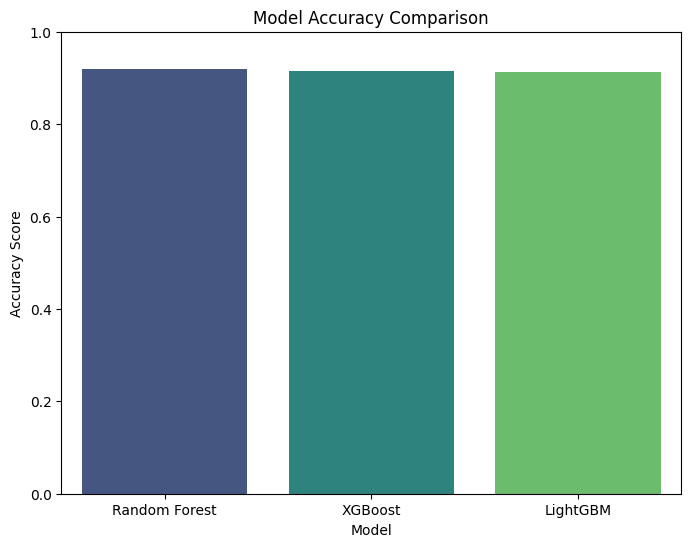

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Accuracy', data=accuracy_comparison, palette='viridis')
plt.ylabel('Accuracy Score')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1.0)
plt.show()

# **Stacking Model**

Random Forest

XGBoost

Neural Network

In [22]:
!pip install scikeras scikit-learn xgboost lightgbm catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.7 MB/s eta 0:00:00


In [30]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from scikeras.wrappers import KerasClassifier
from tensorflow import keras
from tensorflow.keras import layers

# Build small NN
def build_nn(n_features, n_classes):
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=(n_features,)),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(n_classes, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Wrap NN
nn = KerasClassifier(
    model=build_nn,
    n_features=X_train.shape[1],
    n_classes=len(set(y_train)),
    epochs=50,
    batch_size=32,
    verbose=0
)

estimators = [
    ('rf', RandomForestClassifier(
        n_estimators=200,
        max_features='sqrt',
        random_state=42,
        n_jobs=-1
    )),
    ('xgb', XGBClassifier(
        objective='multi:softprob',
        num_class=len(set(y_train)),
        n_estimators=200,
        learning_rate=0.1,
        max_depth=6,
        eval_metric='mlogloss',
        random_state=42,
        use_label_encoder=False,
        n_jobs=-1
    )),
    # ('nn', nn)
]

# Meta-model
final_estimator = LogisticRegression(max_iter=2000, random_state=42)

# Stacking
stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator,
    cv=3,
    n_jobs=-1,
    passthrough=True
)

# Train
stacking_model.fit(X_train, y_train)
y_pred = stacking_model.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score
print("Stacked Model Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Stacked Model Accuracy: 0.9177700348432056
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1421
           1       0.83      0.79      0.81       619
           2       0.86      0.90      0.88       830

    accuracy                           0.92      2870
   macro avg       0.89      0.89      0.89      2870
weighted avg       0.92      0.92      0.92      2870



Model 4

Simple Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

dt_model = DecisionTreeClassifier(
    max_depth=7,
    min_samples_split=53,
    criterion='entropy',
    random_state=42
)

dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Decision Tree Accuracy: 0.8989547038327527
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1421
           1       0.85      0.67      0.75       619
           2       0.80      0.93      0.86       830

    accuracy                           0.90      2870
   macro avg       0.88      0.86      0.86      2870
weighted avg       0.90      0.90      0.90      2870



Feature importance analysis for base learners

Random Forest Feature Importance:


,Feature,Importance
11,koi_model_snr,0.153501
0,koi_fpflag_nt,0.145716
2,koi_fpflag_co,0.130775
1,koi_fpflag_ss,0.110796
8,koi_prad,0.093946
4,koi_period,0.052377
7,koi_depth,0.049956
3,koi_fpflag_ec,0.047047
10,koi_insol,0.041459
6,koi_duration,0.033698



XGBoost Feature Importance:


,Feature,Importance
2,koi_fpflag_co,0.313504
0,koi_fpflag_nt,0.277501
1,koi_fpflag_ss,0.187623
3,koi_fpflag_ec,0.092278
11,koi_model_snr,0.039790
8,koi_prad,0.028129
4,koi_period,0.008882
10,koi_insol,0.007981
7,koi_depth,0.007096
6,koi_duration,0.006890


/tmp/ipython-input-2416044164.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=xgb_importance_df.head(10), palette='viridis')


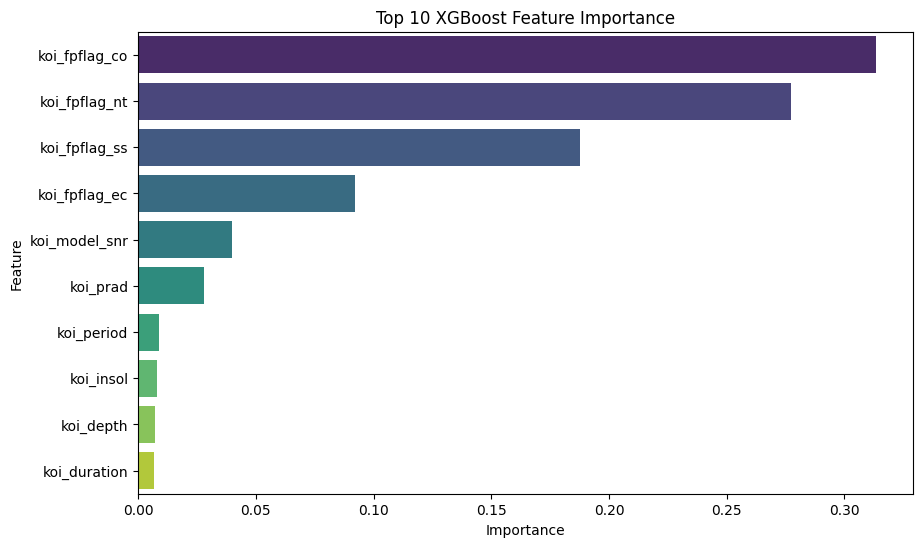

In [32]:

import matplotlib.pyplot as plt
import seaborn as sns

feature_names = X.columns

rf_importance = stacking_model.estimators_[0].feature_importances_
rf_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': rf_importance})
rf_importance_df = rf_importance_df.sort_values(by='Importance', ascending=False)

print("Random Forest Feature Importance:")
display(rf_importance_df)

xgb_importance = stacking_model.estimators_[1].feature_importances_
xgb_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': xgb_importance})
xgb_importance_df = xgb_importance_df.sort_values(by='Importance', ascending=False)

print("\nXGBoost Feature Importance:")
display(xgb_importance_df)



plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=xgb_importance_df.head(10), palette='viridis')
plt.title('Top 10 XGBoost Feature Importance')
plt.show()

Confusion Matrix

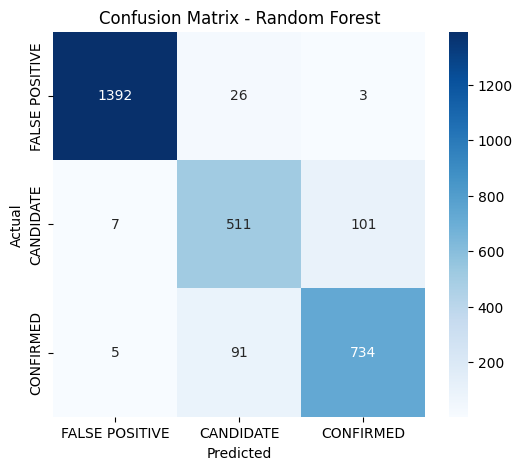

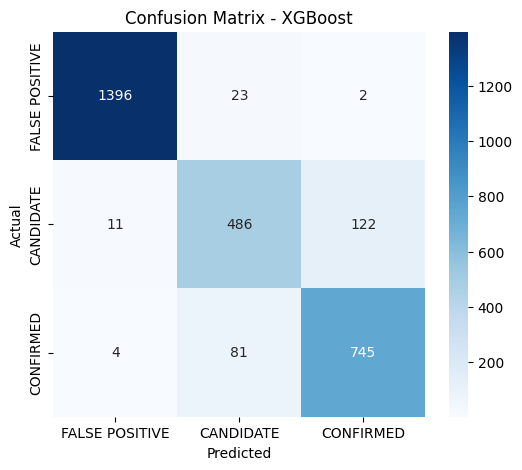

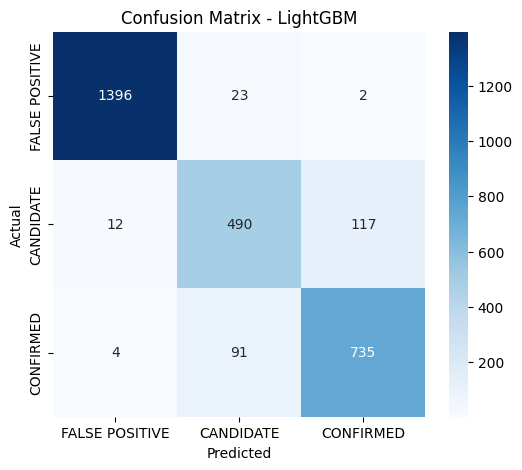

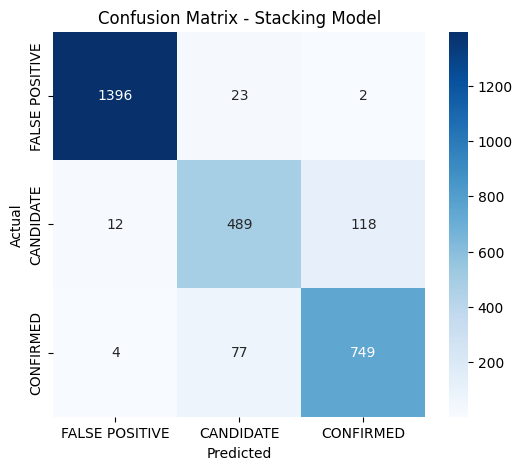

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

class_labels = ['FALSE POSITIVE', 'CANDIDATE', 'CONFIRMED']

def plot_confusion_matrix(y_true, y_pred, model_name, class_labels):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_labels,
                yticklabels=class_labels)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

plot_confusion_matrix(y_test, y_test_pred, "Random Forest", class_labels)
plot_confusion_matrix(y_test, y_test_pred_xgb, "XGBoost", class_labels)
plot_confusion_matrix(y_test, y_test_pred_lgbm, "LightGBM", class_labels)

y_test_pred_stacking = stacking_model.predict(X_test)
plot_confusion_matrix(y_test, y_test_pred_stacking, "Stacking Model", class_labels)

In [ ]:
#testing
import numpy as np

new_samples = np.array([
    [0, 0, 0, 0, 18.64932728, 0.08, 4.4056, 894, 3.12, 701, 57.13, 46.1, 5775, 4.405, 1.053, 15.386],  # first sample
    [0, 0, 1, 0, 9.31392071, 0.1287, 0.971, 164, 1.25, 884, 144.19, 6.6, 6032, 4.485, 0.973, 14.574]     # second sample
])

new_samples_scaled = scaler.transform(new_samples)
pred_classes = stacking_model.predict(new_samples_scaled)
pred_probas = stacking_model.predict_proba(new_samples_scaled)
mapping = {0: "FALSE POSITIVE", 1: "CANDIDATE", 2: "CONFIRMED"}
for i, (cls, proba) in enumerate(zip(pred_classes, pred_probas)):
    print(f"Sample {i+1}:")
    print("Predicted class:", mapping[cls])
    print("Class probabilities:", proba)
    print()